In [40]:

import pandas as pd
import matplotlib.pyplot as plt


In [8]:
scoring = pd.read_pickle('../data/interim/master_score.pkl')
team_splits = pd.read_pickle('../data/interim/teams_team_splits.pkl')

In [9]:
scoring.head()

,firstName,lastName,pos,playerID,year,tmID,GP,G,A,Pts,SOG
0,Antti,Aalto,C,aaltoan01,1997,ANA,3.0,0.0,0.0,0.0,1.0
1,Antti,Aalto,C,aaltoan01,1998,ANA,73.0,3.0,5.0,8.0,61.0
2,Antti,Aalto,C,aaltoan01,1999,ANA,63.0,7.0,11.0,18.0,102.0
3,Antti,Aalto,C,aaltoan01,2000,ANA,12.0,1.0,1.0,2.0,18.0
4,Justin,Abdelkader,L,abdelju01,2007,DET,2.0,0.0,0.0,0.0,6.0


In [10]:
three_years = scoring.loc[(scoring['year'] > 2000) & (scoring['year'] < 2004)]

In [11]:
three_years

,firstName,lastName,pos,playerID,year,tmID,GP,G,A,Pts,SOG
9,Ramzi,Abid,L,abidra01,2002,PHO,30.0,10.0,8.0,18.0,52.0
10,Ramzi,Abid,L,abidra01,2002,PIT,3.0,0.0,0.0,0.0,7.0
11,Ramzi,Abid,L,abidra01,2003,PIT,16.0,3.0,2.0,5.0,35.0
37,Craig,Adams,R,adamscr01,2001,CAR,33.0,0.0,1.0,1.0,17.0
38,Craig,Adams,R,adamscr01,2002,CAR,81.0,6.0,12.0,18.0,107.0
...,...,...,...,...,...,...,...,...,...,...,...
27906,Andrei,Zyuzin,D,zyuzian01,2001,TBL,9.0,0.0,2.0,2.0,14.0
27907,Andrei,Zyuzin,D,zyuzian01,2001,NJD,38.0,1.0,2.0,3.0,47.0
27908,Andrei,Zyuzin,D,zyuzian01,2002,NJD,1.0,0.0,1.0,1.0,0.0
27909,Andrei,Zyuzin,D,zyuzian01,2002,MIN,66.0,4.0,12.0,16.0,113.0


In [12]:
three_years = three_years.drop_duplicates(subset=["playerID", 'year'])

In [13]:
counts = three_years.value_counts('playerID')
counts

playerID
zyuzian01    3
zubruda01    3
adamscr01    3
adamske01    3
aebisda01    3
            ..
virtato01    1
vorobpa01    1
vujtevl01    1
brookwa01    1
vasilhe01    1
Name: count, Length: 1320, dtype: int64

In [14]:
index = counts.loc[counts == 3].sample(3).index
index

Index(['rolosdw01', 'pilarka01', 'gillha01'], dtype='object', name='playerID')

In [15]:
df_3 = three_years.loc[three_years['playerID'].isin(index)]
df_3

,firstName,lastName,pos,playerID,year,tmID,GP,G,A,Pts,SOG
8220,Hal,Gill,D,gillha01,2001,BOS,79.0,4.0,18.0,22.0,137.0
8221,Hal,Gill,D,gillha01,2002,BOS,76.0,4.0,13.0,17.0,114.0
8222,Hal,Gill,D,gillha01,2003,BOS,82.0,2.0,7.0,9.0,104.0
19717,Karel,Pilar,D,pilarka01,2001,TOR,23.0,1.0,3.0,4.0,32.0
19718,Karel,Pilar,D,pilarka01,2002,TOR,17.0,3.0,4.0,7.0,22.0
19719,Karel,Pilar,D,pilarka01,2003,TOR,50.0,2.0,17.0,19.0,74.0
21439,Dwayne,Roloson,G,rolosdw01,2001,MIN,45.0,0.0,0.0,0.0,0.0
21440,Dwayne,Roloson,G,rolosdw01,2002,MIN,50.0,0.0,1.0,1.0,0.0
21441,Dwayne,Roloson,G,rolosdw01,2003,MIN,48.0,0.0,1.0,1.0,0.0


In [16]:
basic_df_3 = df_3[['playerID', 'year', 'G']]

In [17]:
basic_df_3 # This is a long format

,playerID,year,G
8220,gillha01,2001,4.0
8221,gillha01,2002,4.0
8222,gillha01,2003,2.0
19717,pilarka01,2001,1.0
19718,pilarka01,2002,3.0
19719,pilarka01,2003,2.0
21439,rolosdw01,2001,0.0
21440,rolosdw01,2002,0.0
21441,rolosdw01,2003,0.0


In [18]:
pivot = (
    basic_df_3.pivot(index='playerID', columns='year', values='G'))
pivot# This is a wide format

year,2001,2002,2003
playerID,,,
gillha01,4.0,4.0,2.0
pilarka01,1.0,3.0,2.0
rolosdw01,0.0,0.0,0.0


In [19]:
pivot.index

Index(['gillha01', 'pilarka01', 'rolosdw01'], dtype='object', name='playerID')

In [20]:
pivot.columns

Index([2001, 2002, 2003], dtype='int64', name='year')

In [21]:
pivot.index.name = None

In [22]:
pivot.columns.name = None

In [23]:
pivot

,2001,2002,2003
gillha01,4.0,4.0,2.0
pilarka01,1.0,3.0,2.0
rolosdw01,0.0,0.0,0.0


In [24]:
pivot.index.name = 'playerID'

In [25]:
pivot.columns.name = 'year'

In [26]:
pivot

year,2001,2002,2003
playerID,,,
gillha01,4.0,4.0,2.0
pilarka01,1.0,3.0,2.0
rolosdw01,0.0,0.0,0.0


In [27]:
basic_df_3

,playerID,year,G
8220,gillha01,2001,4.0
8221,gillha01,2002,4.0
8222,gillha01,2003,2.0
19717,pilarka01,2001,1.0
19718,pilarka01,2002,3.0
19719,pilarka01,2003,2.0
21439,rolosdw01,2001,0.0
21440,rolosdw01,2002,0.0
21441,rolosdw01,2003,0.0


In [28]:
basic_df_3.set_index('playerID')

,year,G
playerID,,
gillha01,2001,4.0
gillha01,2002,4.0
gillha01,2003,2.0
pilarka01,2001,1.0
pilarka01,2002,3.0
pilarka01,2003,2.0
rolosdw01,2001,0.0
rolosdw01,2002,0.0
rolosdw01,2003,0.0


AttributeError: Line2D.set() got an unexpected keyword argument 'plot'

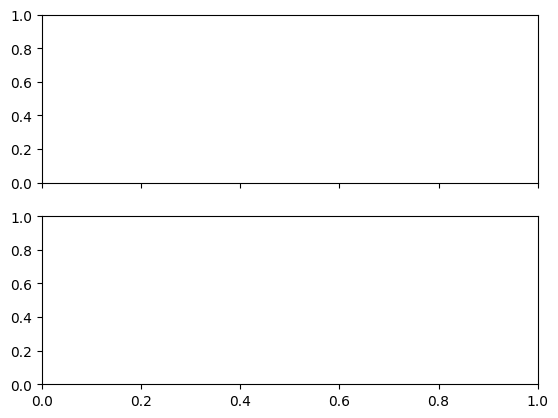

In [41]:
ax1, ax32 = basic_df_3.set_index('playerID').plot(plot='bar', subplots=True)
plt.show()

In [42]:
fig, ax = plt.sub(figsize=(10, 5))
pivot.plot(kind='bar', ax=ax)



AttributeError: module 'matplotlib.pyplot' has no attribute 'sub'

In [37]:
pivot

year,2001,2002,2003
playerID,,,
gillha01,4.0,4.0,2.0
pilarka01,1.0,3.0,2.0
rolosdw01,0.0,0.0,0.0


In [44]:
piwot = pivot.reset_index(inplace=True)

In [45]:
pivot.melt(id_vars=['playerID'])

,playerID,year,value
0,gillha01,2001,4.0
1,pilarka01,2001,1.0
2,rolosdw01,2001,0.0
3,gillha01,2002,4.0
4,pilarka01,2002,3.0
5,rolosdw01,2002,0.0
6,gillha01,2003,2.0
7,pilarka01,2003,2.0
8,rolosdw01,2003,0.0


In [46]:
pivot.melt(id_vars=['playerID'], var_name='year', value_name='goals')

,playerID,year,goals
0,gillha01,2001,4.0
1,pilarka01,2001,1.0
2,rolosdw01,2001,0.0
3,gillha01,2002,4.0
4,pilarka01,2002,3.0
5,rolosdw01,2002,0.0
6,gillha01,2003,2.0
7,pilarka01,2003,2.0
8,rolosdw01,2003,0.0


In [47]:
pivot.melt(id_vars=['playerID'], var_name='year', value_name='goals', value_vars=[2001, 2002])

,playerID,year,goals
0,gillha01,2001,4.0
1,pilarka01,2001,1.0
2,rolosdw01,2001,0.0
3,gillha01,2002,4.0
4,pilarka01,2002,3.0
5,rolosdw01,2002,0.0


In [50]:
larger_df_3 = df_3[['playerID', 'tmID', 'year', 'G']]

In [51]:
larger_df_3

,playerID,tmID,year,G
8220,gillha01,BOS,2001,4.0
8221,gillha01,BOS,2002,4.0
8222,gillha01,BOS,2003,2.0
19717,pilarka01,TOR,2001,1.0
19718,pilarka01,TOR,2002,3.0
19719,pilarka01,TOR,2003,2.0
21439,rolosdw01,MIN,2001,0.0
21440,rolosdw01,MIN,2002,0.0
21441,rolosdw01,MIN,2003,0.0


In [52]:
larger_df_3.pivot(index=['playerID', 'tmID'], columns='year', values='G')

,year,2001,2002,2003
playerID,tmID,,,
gillha01,BOS,4.0,4.0,2.0
pilarka01,TOR,1.0,3.0,2.0
rolosdw01,MIN,0.0,0.0,0.0


In [53]:
larger_df_3 = df_3[['playerID', 'tmID', 'year', 'G', 'A']]

In [54]:
larger_df_3.pivot(index=['playerID', 'tmID'], columns='year', values=['G', 'A'])

G               A            
year           2001 2002 2003  2001  2002  2003
playerID  tmID                                 
gillha01  BOS   4.0  4.0  2.0  18.0  13.0   7.0
pilarka01 TOR   1.0  3.0  2.0   3.0   4.0  17.0
rolosdw01 MIN   0.0  0.0  0.0   0.0   1.0   1.0

In [55]:
result = larger_df_3.pivot(index=['playerID', 'tmID'], columns='year', values=['G', 'A'])

In [56]:
result.columns

MultiIndex([('G', 2001),
            ('G', 2002),
            ('G', 2003),
            ('A', 2001),
            ('A', 2002),
            ('A', 2003)],
           names=[None, 'year'])

In [61]:
result.loc['gillha01',('A', 2001)]

tmID
BOS    18.0
Name: (A, 2001), dtype: float64

NameError: name 'team_splits' is not defined